<class 'numpy.ndarray'>


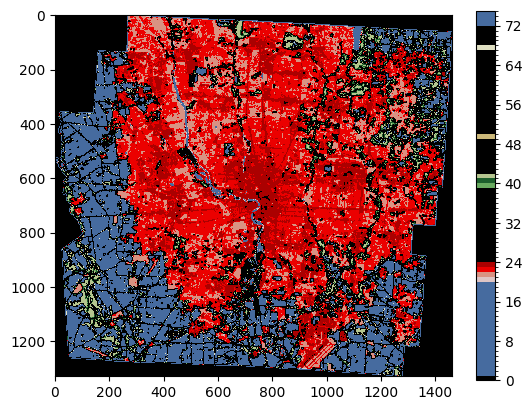

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Read the CLR file
clr_file = "NLCD_color_map.clr"
values = []
colors = []
count = 0
with open(clr_file, 'r') as file:
    for line in file:
        parts = line.split()
        if count == 75:
            break
        value = int(parts[0])
        r = int(parts[1]) / 255.0
        g = int(parts[2]) / 255.0
        b = int(parts[3]) / 255.0
        values.append(value)
        colors.append((r, g, b))
        count+=1

# Create the colormap
cmap = ListedColormap(colors, N=80)

# Create boundaries based on your specific values
boundaries = values + [values[-1] + 1]

# Use BoundaryNorm to map the data values to the colormap
norm = BoundaryNorm(boundaries, cmap.N)

with rasterio.open('county_raster.tif') as src:
    band1 = src.read(1)  # Read the first band

print(type(band1))

# Plot the data
plt.imshow(band1, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()